Bienvenido al Notebook del Capítulo 2: Automatice su informe financiero con Python
Ingrese el ticker del activo (ej. AAPL, GOOGL, TSLA, USDCOP=X): GOOGL
Ingrese la fecha de inicio (YYYY-MM-DD): 2020-01-01
Ingrese la fecha de fin (YYYY-MM-DD): 2025-06-17
Descargando datos para GOOGL desde 2020-01-01 hasta 2025-06-17...


/tmp/ipython-input-1-1525689783.py:32: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=fecha_inicio, end=fecha_fin)
[*********************100%***********************]  1 of 1 completed


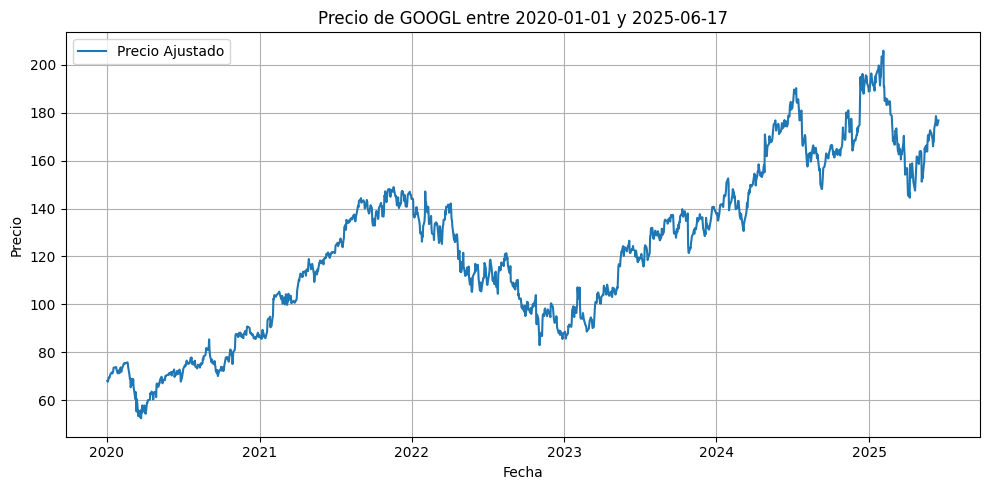


Resumen generado:
Entre 2020-01-01 y 2025-06-17, el activo GOOGL tuvo un retorno acumulado de 159.86%.
El gráfico ha sido guardado como 'grafico_GOOGL.png'.


In [ ]:
# Capítulo 2 - Notebook: Automatice su informe financiero

# ᵀᴹᴸ Bienvenida
print("Bienvenido al Notebook del Capítulo 2: Automatice su informe financiero con Python")

# ᵀᴾᴼ Instalación de librerías necesarias
!pip install yfinance --quiet

# ᵀᴾᴼ Importación de librerías
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime

# ᵀᴾᴼ Inputs del usuario
ticker = input("Ingrese el ticker del activo (ej. AAPL, GOOGL, TSLA, USDCOP=X): ")
fecha_inicio = input("Ingrese la fecha de inicio (YYYY-MM-DD): ")
fecha_fin = input("Ingrese la fecha de fin (YYYY-MM-DD): ")

# Validación de fechas
def validar_fecha(fecha):
    try:
        return datetime.strptime(fecha, "%Y-%m-%d")
    except:
        raise ValueError("Formato de fecha inválido. Use YYYY-MM-DD.")

validar_fecha(fecha_inicio)
validar_fecha(fecha_fin)

# Descarga de datos
print(f"Descargando datos para {ticker} desde {fecha_inicio} hasta {fecha_fin}...")
data = yf.download(ticker, start=fecha_inicio, end=fecha_fin)

# Verificación de columnas disponibles
if 'Adj Close' in data.columns:
    data = data[['Adj Close']].rename(columns={'Adj Close': 'Precio Ajustado'})
elif 'Close' in data.columns:
    data = data[['Close']].rename(columns={'Close': 'Precio Ajustado'})
else:
    raise KeyError("No se encontró ni 'Adj Close' ni 'Close' en los datos descargados.")

# Cálculo de retornos
data['Retorno Diario'] = data['Precio Ajustado'].pct_change()
data['Retorno Acumulado'] = (1 + data['Retorno Diario']).cumprod() - 1

# Visualización
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Precio Ajustado'], label='Precio Ajustado')
plt.title(f"Precio de {ticker} entre {fecha_inicio} y {fecha_fin}")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.grid(True)
plt.legend()
plt.tight_layout()

# Exportación de la gráfica
nombre_archivo = f"grafico_{ticker}.png"
plt.savefig(nombre_archivo)
plt.show()

# Comentario automático
retorno_total = round(data['Retorno Acumulado'].iloc[-1] * 100, 2)
print(f"\nResumen generado:")
print(f"Entre {fecha_inicio} y {fecha_fin}, el activo {ticker} tuvo un retorno acumulado de {retorno_total}%.")
print(f"El gráfico ha sido guardado como '{nombre_archivo}'.")
